# Ensembling

In this notebook, we have tried 3 Ensembling Techniques - AdaBoost, GradientBoost and Stacking. The best scoring model will be a candidate of our final model.

## 1. AdaBoost


Train: accuracy:  1.0
Train: f1_score:  1.0
Train: precision:  1.0
Train: recall:  1.0

Test: bal accuracy:  0.59
Test: f1_score:  0.19
Test: precision:  0.2
Test: recall:  0.18


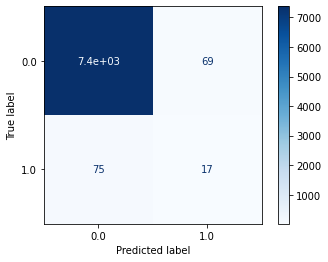

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train = pd.read_csv('xtrain.csv', sep=',')
y_train= pd.read_csv('ytrain.csv', sep=',')
X_test = pd.read_csv('xtest.csv', sep=',')
y_test = pd.read_csv('ytest.csv', sep=',')


y_train=y_train.values.ravel()

y_test=y_test.values.ravel()


#Define the ensemble
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.002, random_state=42)
ada_clf.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score
y_pred = ada_clf.predict(X_test)    
   

print('\nTrain: accuracy: ', round(accuracy_score(y_train, ada_clf.predict(X_train)), 2))
print('Train: f1_score: ', round(f1_score(y_train, ada_clf.predict(X_train)), 2))
print('Train: precision: ', round(precision_score(y_train, ada_clf.predict(X_train)), 2))
print('Train: recall: ', round(recall_score(y_train, ada_clf.predict(X_train)), 2))

print('\nTest: bal accuracy: ', round(balanced_accuracy_score(y_test, y_pred), 2))
print('Test: f1_score: ', round(f1_score(y_test, y_pred), 2))
print('Test: precision: ', round(precision_score(y_test, y_pred), 2))
print('Test: recall: ', round(recall_score(y_test, y_pred), 2))

plot_confusion_matrix(ada_clf, X_test,  y_test, cmap=plt.cm.Blues);      

In [ ]:
ada_clf

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=15,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [ ]:
import joblib
joblib.dump(ada_clf, 'adaboost_clf.pkl')

['adaboost_clf.pkl']

## 2. GradientBoost


Train: accuracy:  0.87
Train: f1_score:  0.86
Train: precision:  0.96
Train: recall:  0.77

Test: bal accuracy:  0.68
Test: f1_score:  0.19
Test: precision:  0.12
Test: recall:  0.39


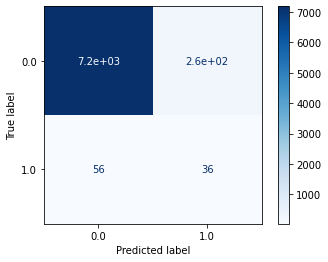

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score

gbrt_clf = GradientBoostingClassifier(max_depth=2, n_estimators=4, learning_rate=0.9, random_state=42)
gbrt_clf.fit(X_train, y_train)

y_pred = gbrt_clf.predict(X_test)

print('\nTrain: accuracy: ', round(accuracy_score(y_train, gbrt_clf.predict(X_train)), 2))
print('Train: f1_score: ', round(f1_score(y_train, gbrt_clf.predict(X_train)), 2))
print('Train: precision: ', round(precision_score(y_train, gbrt_clf.predict(X_train)), 2))
print('Train: recall: ', round(recall_score(y_train, gbrt_clf.predict(X_train)), 2))

print('\nTest: bal accuracy: ', round(balanced_accuracy_score(y_test, y_pred), 2))
print('Test: f1_score: ', round(f1_score(y_test, y_pred), 2))
print('Test: precision: ', round(precision_score(y_test, y_pred), 2))
print('Test: recall: ', round(recall_score(y_test, y_pred), 2))

plot_confusion_matrix(gbrt_clf, X_test,  y_test, cmap=plt.cm.Blues);        

In [ ]:
joblib.dump(gbrt_clf, 'gradientBoost_clf.pkl')

['gradientBoost_clf.pkl']

## 3. Stacking

In [ ]:
######### using LR, SVM,decision Tree,  Randomforest and neural for stacking
# training logistic regression model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

"""
Stacking
"""
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(max_iter=1600, random_state=42)))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_split=20,random_state=42)))
level0.append(('svm', SVC(random_state=42)))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1600,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=42,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                  


Train: accuracy:  1.0
Train: f1_score:  1.0
Train: precision:  1.0
Train: recall:  1.0

Test: bal accuracy:  0.61
Test: f1_score:  0.28
Test: precision:  0.36
Test: recall:  0.23


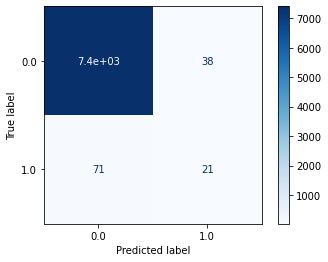

In [ ]:
# test the with our original test data 
y_pred_stacking = model.predict(X_test)

print('\nTrain: accuracy: ', round(accuracy_score(y_train, model.predict(X_train)), 2))
print('Train: f1_score: ', round(f1_score(y_train, model.predict(X_train)), 2))
print('Train: precision: ', round(precision_score(y_train, model.predict(X_train)), 2))
print('Train: recall: ', round(recall_score(y_train, model.predict(X_train)), 2))

print('\nTest: bal accuracy: ', round(balanced_accuracy_score(y_test, y_pred_stacking), 2))
print('Test: f1_score: ', round(f1_score(y_test, y_pred_stacking), 2))
print('Test: precision: ', round(precision_score(y_test, y_pred_stacking), 2))
print('Test: recall: ', round(recall_score(y_test, y_pred_stacking), 2))

plot_confusion_matrix(model, X_test,  y_test, cmap=plt.cm.Blues);        

In [ ]:
joblib.dump(model, 'stacking_clf.pkl')

['stacking_clf.pkl']